# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

#將資料轉為Dataframe
import pandas as pd
df = pd.DataFrame(iris['data'], columns= iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


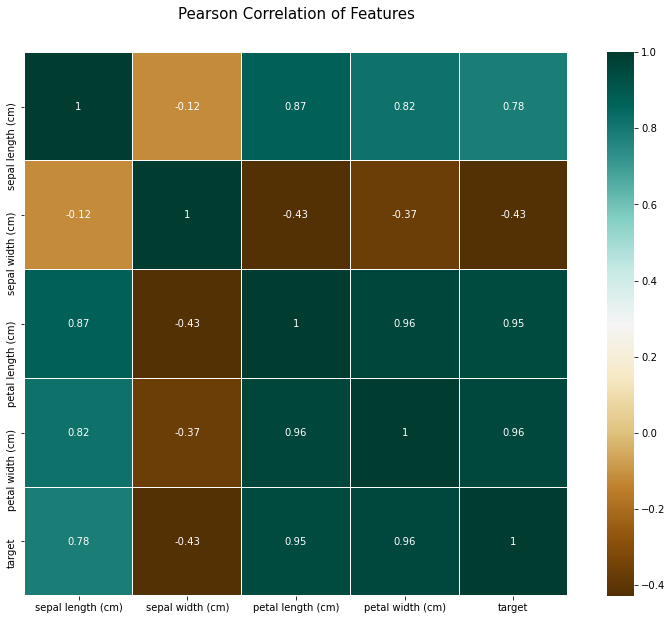

In [2]:
#EDA-以heatmap方式了解資料
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG",
            linewidths=0.1, square=True, linecolor='white',
            annot=True)

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [3]:
from sklearn.cluster import AgglomerativeClustering
#單一連結聚合演算法(single-linkage agglomerative algorithm):群間的距離定義為兩群中最近點的距離.
#完整連結聚合演算法(complete-linkage agglomerative algorithm):群間的距離定義為兩群中最遠點間的距離.
#平均連結聚合演算法(average-linkage agglomerative algorithm):群間的距離定義為兩群間各點間的距離總和平均.
#中心聚合演算法(centroid method):群間的距離定義為兩群中心點間的距離.
#沃德法(Ward’s method):群間的距離定義為兩群合併後, 各點到合併群中心的距離平方和.
estimators = [('hc_single', AgglomerativeClustering(n_clusters=3, linkage="single")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

#### 3D繪圖查看各個演算法的差異

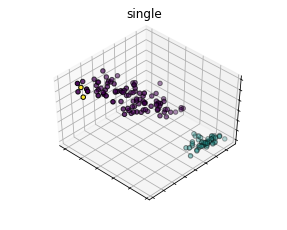

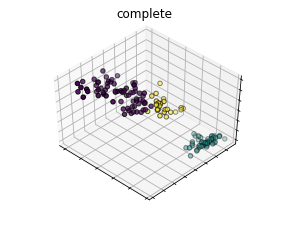

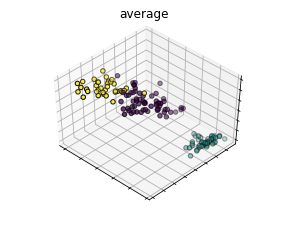

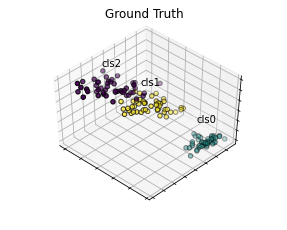

In [4]:
#3D製圖
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fignum = 1
titles = ['single', 'complete', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    #Axes3D:定義一個3D的圖形
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    #est.fit:根據上面estimators去fit資料庫的圖
    est.fit(X)
    
    labels = est.labels_

    #ax.scatter:畫散點圖, 後面的參數用來調整顏色
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    #ax.dist:設定與物體之間的距離
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    #ax.text3D:將不同label的資料標上個別物種類名稱, 裡面 X[y == label, 3].mean()用在調整text的X, Y ,Z 軸位置
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#np.choose:將原本label順序的(0 1 2)改成(1 2 0)
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

#### 2D繪圖查看各個演算法的差異

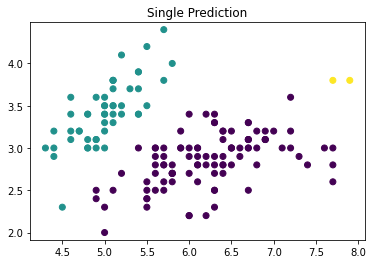

In [5]:
#2D畫法
#參數設定(群集數, 非必要設定)
n = 3
#Agglomerative Clustering method
model = AgglomerativeClustering(n_clusters = n, linkage = 'single')
model.fit(X)
labels = model.fit_predict(X)
#results visualization
plt.figure()
plt.scatter(X[:,0], X[:,1], c = labels)
plt.axis('equal')
plt.title('Single Prediction')

plt.show()

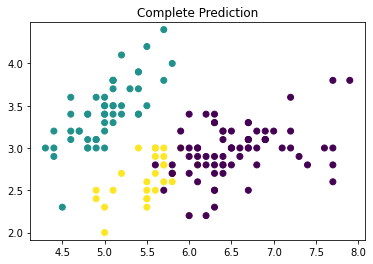

In [6]:
#參數設定(群集數, 非必要設定)
n = 3
#Agglomerative Clustering method
model = AgglomerativeClustering(n_clusters = n, linkage = 'complete')
model.fit(X)
labels = model.fit_predict(X)
#results visualization
plt.figure()
plt.scatter(X[:,0], X[:,1], c = labels)
plt.axis('equal')
plt.title('Complete Prediction')

plt.show()

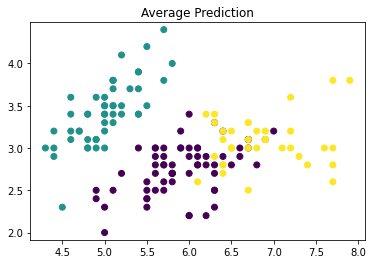

In [7]:
#參數設定(群集數, 非必要設定)
n = 3
#Agglomerative Clustering method
model = AgglomerativeClustering(n_clusters = n, linkage = 'average')
model.fit(X)
labels = model.fit_predict(X)
#results visualization
plt.figure()
plt.scatter(X[:,0], X[:,1], c = labels)
plt.axis('equal')
plt.title('Average Prediction')

plt.show()

#### 樹狀圖查看各個演算法的差異

In [8]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# # Performs hierarchical/agglomerative clustering on X by using "Ward's method"
# linkage_matrix = linkage(X, 'single')
# figure = plt.figure(figsize=(20, 15))
# # Plots the dendrogram
# dendrogram(linkage_matrix, labels = labels)
# plt.title('Hierarchical Clustering Dendrogram (Single)')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# plt.tight_layout()
# plt.show()

In [9]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# # Performs hierarchical/agglomerative clustering on X by using "Ward's method"
# linkage_matrix = linkage(X, 'complete')
# figure = plt.figure(figsize=(20, 15))
# # Plots the dendrogram
# dendrogram(linkage_matrix, labels = labels)
# plt.title('Hierarchical Clustering Dendrogram (Complete)')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# plt.tight_layout()
# plt.show()

In [10]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# # Performs hierarchical/agglomerative clustering on X by using "Ward's method"
# linkage_matrix = linkage(X, 'average')
# figure = plt.figure(figsize=(20, 15))
# # Plots the dendrogram
# dendrogram(linkage_matrix, labels = labels)
# plt.title('Hierarchical Clustering Dendrogram (Average)')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# plt.tight_layout()
# plt.show()